<a href="https://colab.research.google.com/github/Nehueiy/Elevvo-Projects/blob/main/Customer_Segmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Step 2: Load the data
url = "https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv"
df = pd.read_csv(url)

In [3]:
# Step 3: Explore
print("Dataset Preview:")
display(df.head())

print("\n Dataset Info:")
df.info()

print("\n Missing Values:")
print(df.isnull().sum())


Dataset Preview:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


/tmp/ipython-input-2045724165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


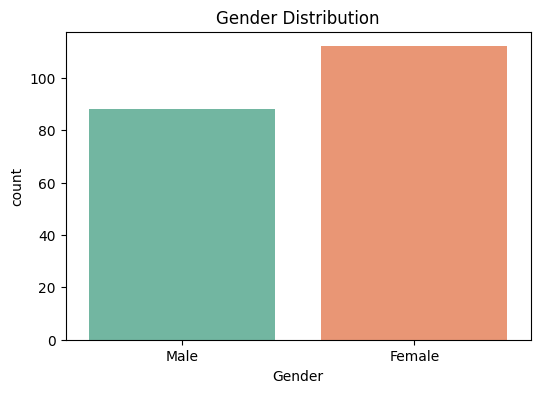

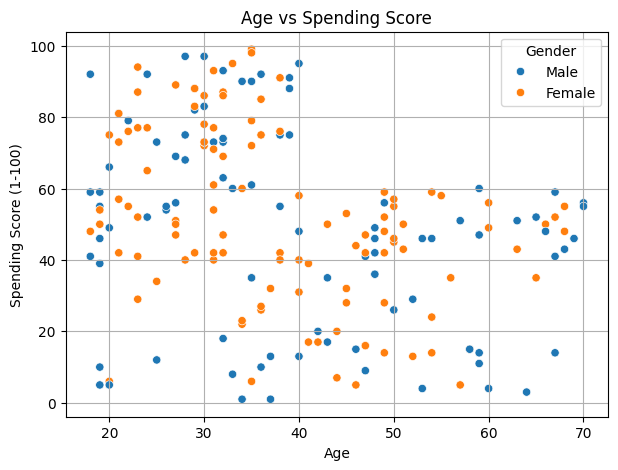

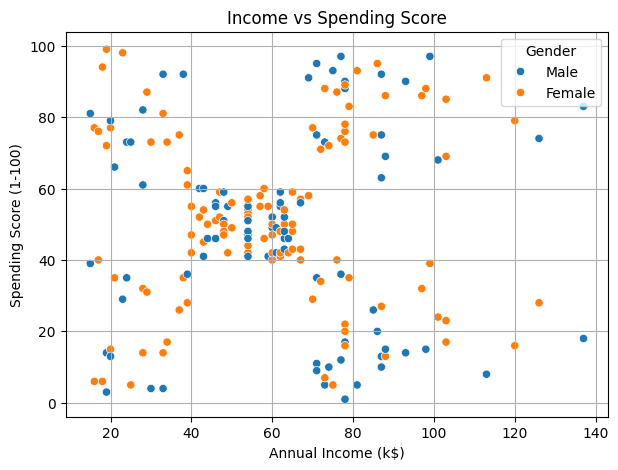

In [4]:
# Step 4: Basic Visual Analysis
# Distribution of Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Age vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs Spending Score')
plt.grid(True)
plt.show()

# Income vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Income vs Spending Score')
plt.grid(True)
plt.show()

#step5: determine the two columns to use in clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

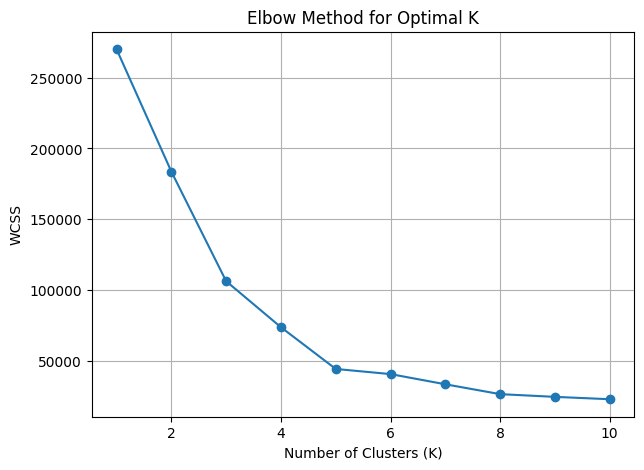

In [5]:
# Step 6: Elbow Method to find optimal K

from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


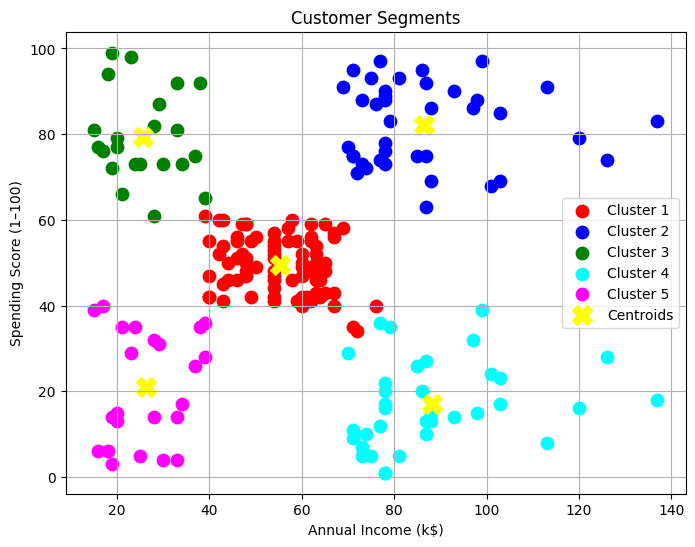

In [6]:
# step7: Train the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8,6))

plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1],
            s=80, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1],
            s=80, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1],
            s=80, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1],
            s=80, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1],
            s=80, c='magenta', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# step8: Add cluster labels to the original dataset
df['Cluster'] = y_kmeans

# Group by cluster and calculate mean values
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)

print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                      55.3                    49.5
1                      86.5                    82.1
2                      25.7                    79.4
3                      88.2                    17.1
4                      26.3                    20.9


In [9]:
#Step 9: 3D Plot for Customer Clusters using Plotly

import plotly.express as px

# Create a new DataFrame with selected features + cluster
plot_df = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Cluster']]

# 3D scatter plot
fig = px.scatter_3d(
    plot_df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    z='Age',
    color='Cluster',
    symbol='Cluster',
    title='3D Customer Segments: Income vs Spending vs Age',
    labels={
        'Annual Income (k$)': 'Income (k$)',
        'Spending Score (1-100)': 'Spending Score',
        'Age': 'Age'
    },
    width=800,
    height=600
)

fig.update_traces(marker=dict(size=5))
fig.show()